## 探索性数据分析 EDA
数据探索是解决赛题和实际问题必不可少的基本步骤，良好的数据探索对制定快速有效的解决方案至关重要。一般来说，EDA主要包括数据集总览、异常值检测，变量分析及数据分布可视化，下面结合本赛题进行EDA。

### 数据集总览
数据集总览可以让我们对数据有大致的了解，包括数据集样本数量、特征名和意义、数据类型等，对重复或者无意义的字段进行处理


In [1]:
# 读取数据
import pandas as pd
train_data = pd.read_csv("./train.csv", encoding='utf-8')
test_data = pd.read_csv("./testA.csv", encoding='utf-8')

In [2]:
# 查看训练集基本信息
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

可以发现，训练集
- 共有80w样本
- 47个特征变量，n0~n14为匿名变量
- 数据类型包括数值型和非数值类型
- 某些特征含有少量缺失值
- isDefault字段为标签

测试集不包含标签字段，其余同训练集类似

另外发现重复字段n2和n2.1，测试集包含n2、n2.1、n2.2、n2.3，应删除

In [19]:
# 查看训练集统计信息
train_data.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252013,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [3]:
train_data = train_data.drop(['n2.1'],axis=1)
test_data = test_data.drop(['n2.1', 'n2.2', 'n2.3'],axis=1)

In [4]:
# 找出可能存在的方差为0的变量，删除
train_one_value_fea = [col for col in train_data.columns if train_data[col].nunique() <= 1]
test_one_value_fea = [col for col in test_data.columns if test_data[col].nunique() <= 1]
print(train_one_value_fea, test_one_value_fea)

train_data = train_data.drop(['policyCode'],axis=1)
test_data = test_data.drop(['policyCode'],axis=1)

['policyCode'] ['policyCode']


### 异常值检测
使用箱线图可视化样本的偏离值情况

In [6]:
# 分离数值变量和非数值变量，数值变量进一步分为连续型变量和离散型变量
continuous_fea = list(train_data.select_dtypes(include=['float16','float64']).columns)
discrete_fea = list(train_data.select_dtypes(include=['int8','int64']).columns)
category_fea = list(train_data.select_dtypes(include=['object']).columns)
numerical_fea = continuous_fea+ discrete_fea
print('continuous_fea: ', continuous_fea)
print('discrete_fea: ', discrete_fea)
print('category_fea: ', category_fea)
print('numerical_fea: ', numerical_fea)


continuous_fea:  ['loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'postCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']
discrete_fea:  ['id', 'term', 'homeOwnership', 'verificationStatus', 'isDefault', 'purpose', 'regionCode', 'initialListStatus', 'applicationType']
category_fea:  ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']
numerical_fea:  ['loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'postCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'id', 'term', 'homeOwnership', 'verificationStatus', 'isDefault', '

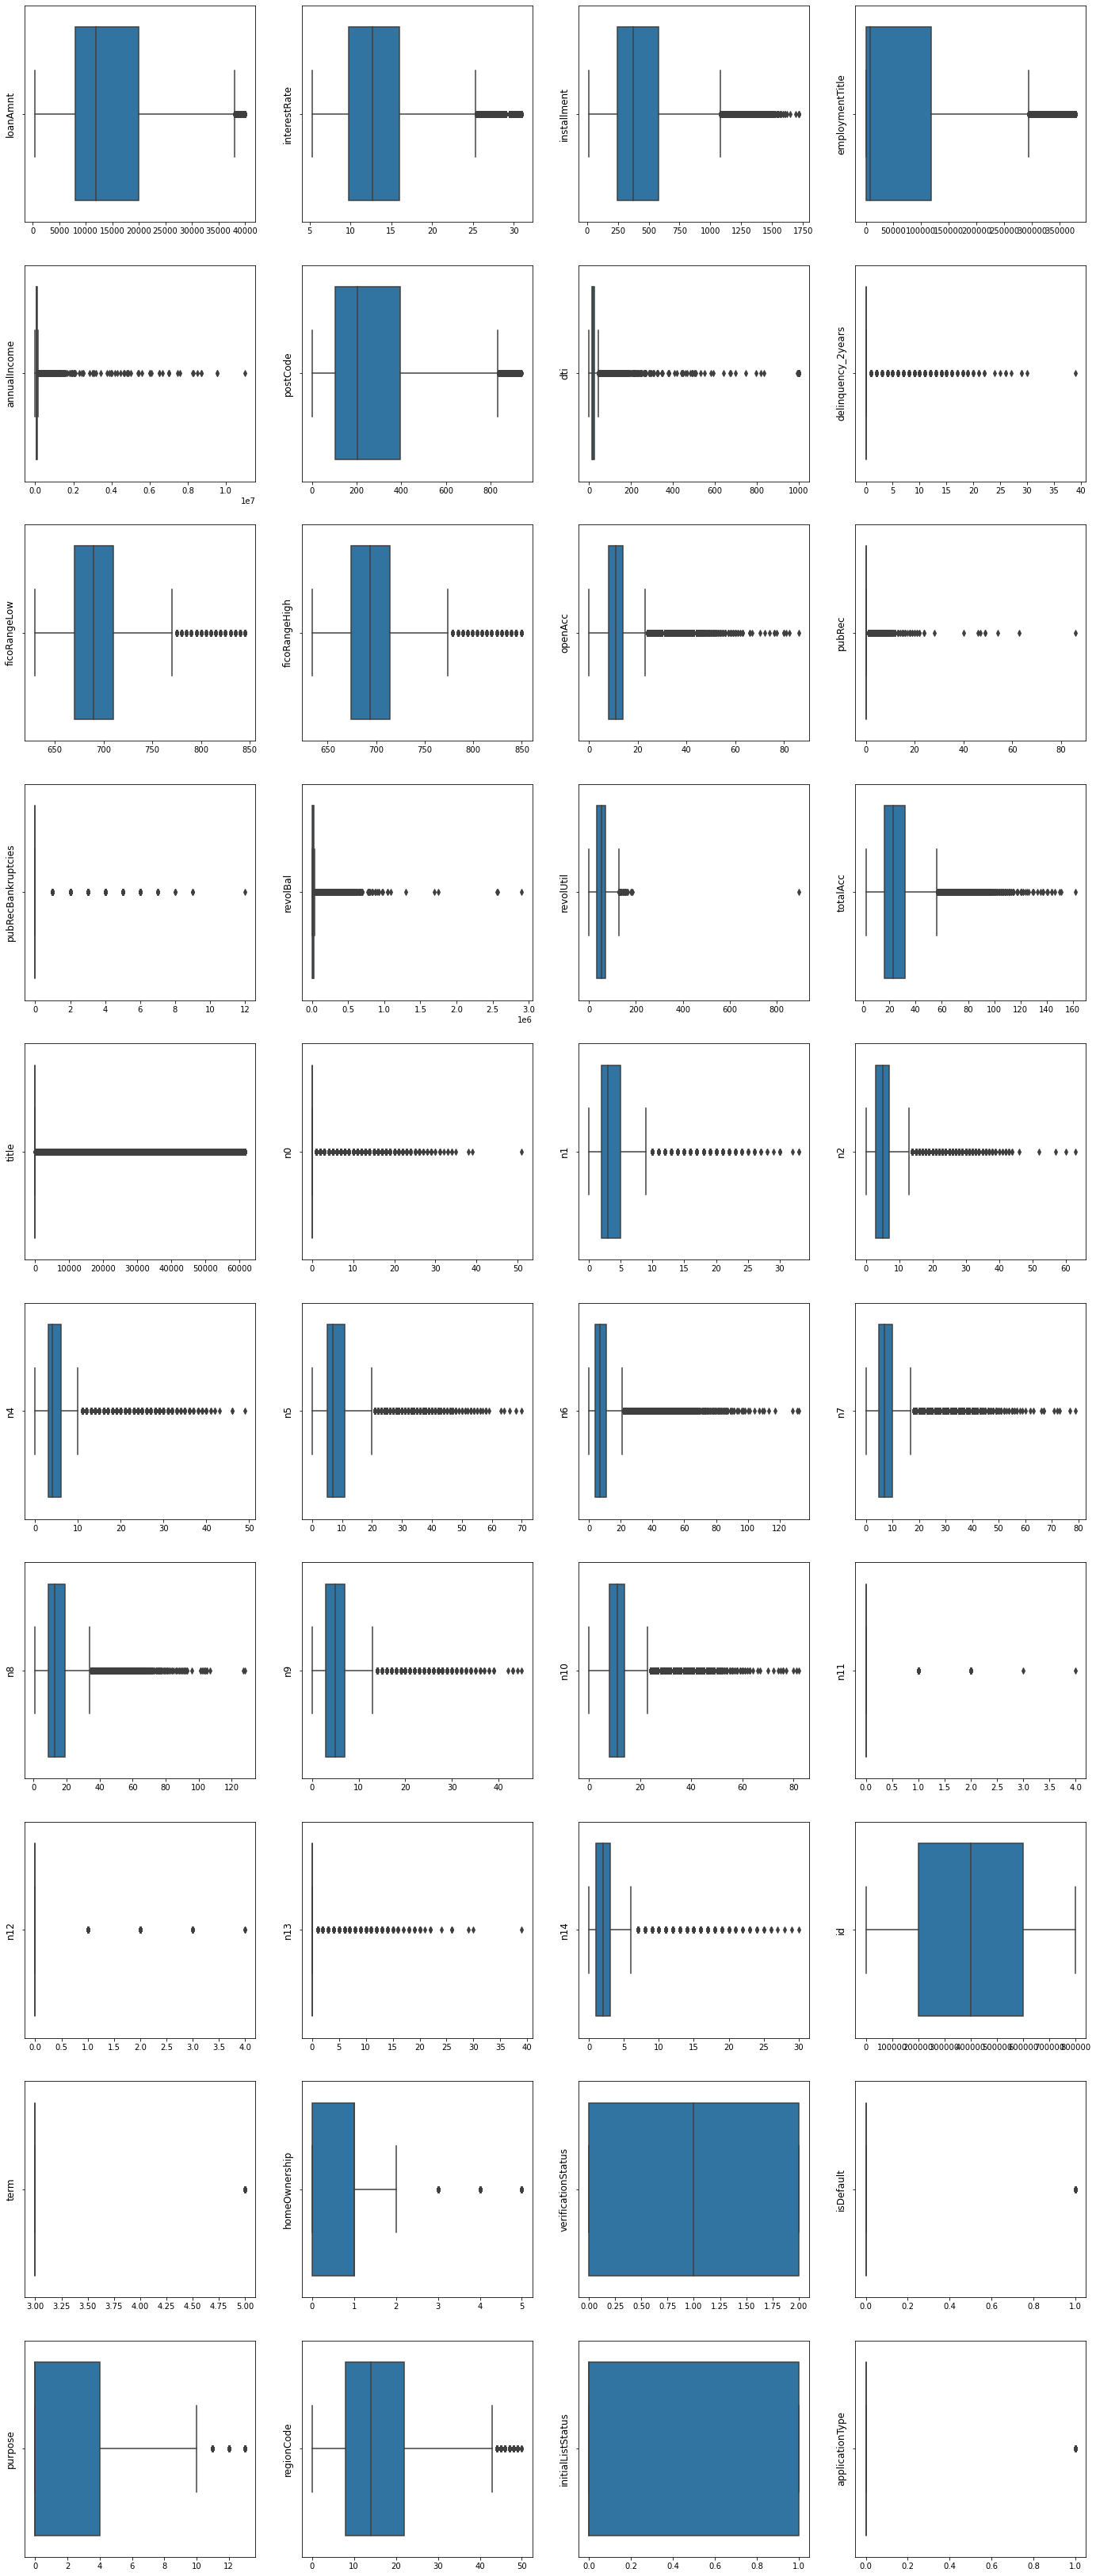

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 异常值分析
# 绘制各个特征箱线图
count_columns = 4
count_rows = len(numerical_fea)
plt.figure(figsize = (6*count_columns, 6*count_rows))
i = 1
for col in numerical_fea:
    ax = plt.subplot(count_rows, count_columns, i)
    #ax = plt.hist(train_data[col].value_counts()[:20].values, label=train_data[col].value_counts()[:20].keys)
    #ax = sns.barplot(train_data[col].value_counts()[:20], train_data[col].value_counts().keys()[:20])
    ax = sns.boxplot(x=train_data[col], orient='v')
    plt.ylabel(col, fontsize=12)

    i+=1
plt.show()

可以看到许多变量都存在偏离值，每个变量偏离的原因要具体分析，例如年收入annualIncome，出现了严重的偏离，最大值达到了1000多万，平均值只有7w6.但这个偏离情况是符合实际的，不应将最大值当作异常值处理

### 变量分析及数据分布可视化
1. 使用直方图观察训练集上各个数值特征的分布，利用Q-Q图观察分布是否符合正态分布，若符合，所有点会落在直线上，若使用基于正态分布的模型，需要对不满足的变量进行处理

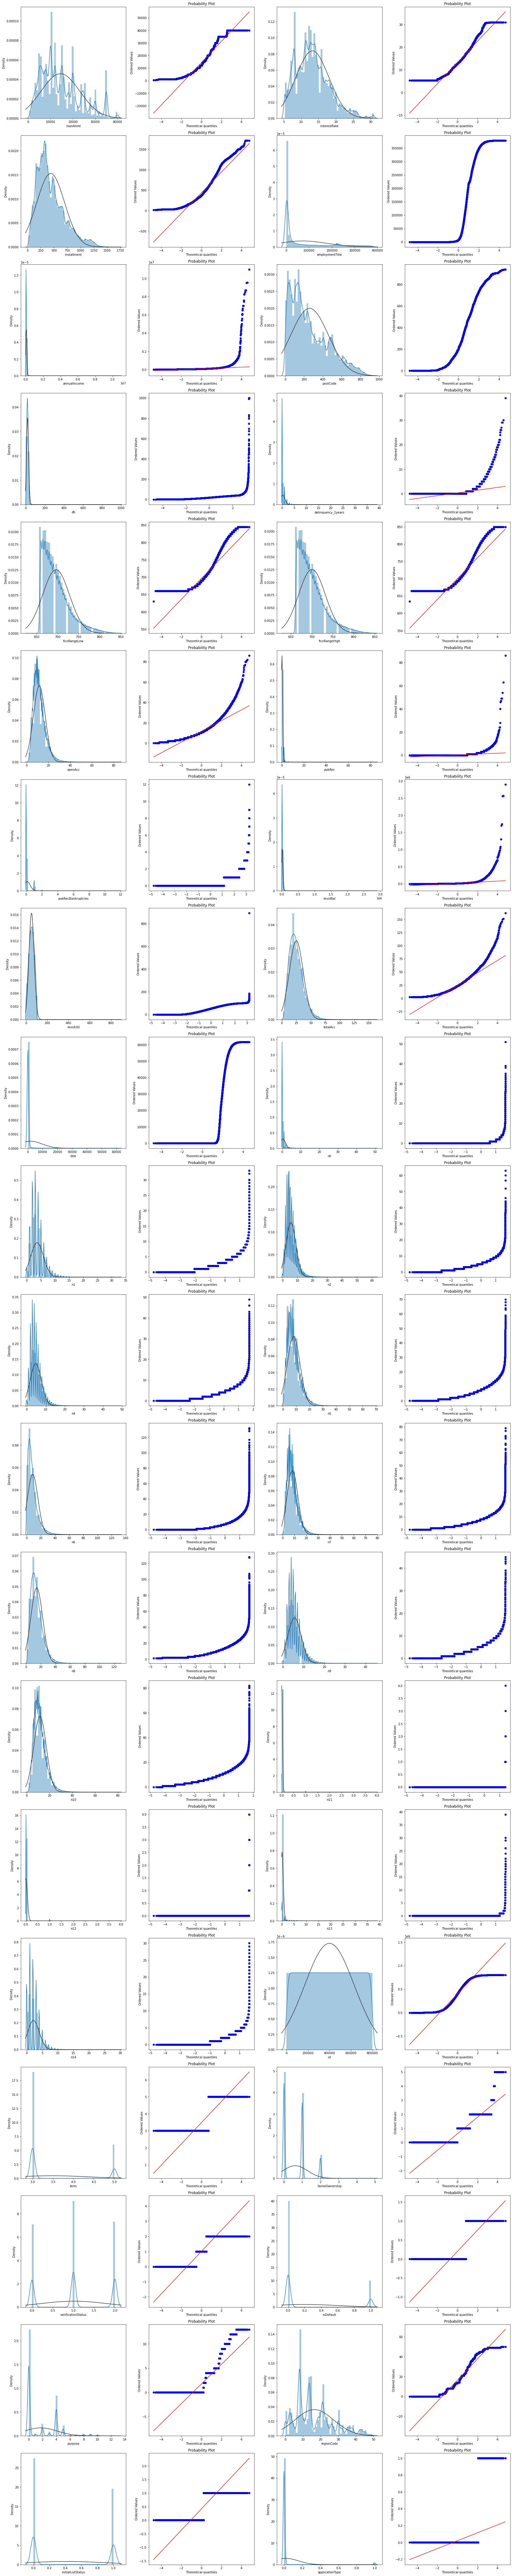

In [20]:
# 通过直方图和Q-Q图查看数值特征是否近似于正态分布
count_columns = 4
count_rows = len(numerical_fea)
plt.figure(figsize = (6*count_columns, 6*count_rows))
i = 0
for col in numerical_fea:
    i+=1
    ax = plt.subplot(count_rows, count_columns, i)
    sns.distplot(train_data[col], fit=stats.norm)
    
    i+=1
    ax = plt.subplot(count_rows, count_columns, i)
    res = stats.probplot(train_data[col], plot=plt)

plt.tight_layout()
plt.show()

可以看到：许多变量不呈正态分布，一些离散类型特征取值很少，可以考虑用类别变量的方式处理，一些变量呈长尾分布，可以通过log变换或者box-cox变换使其接近正态分布。
2. 使用KDE图查看训练集和测试集的特征分布差异，删去分布差异很大的特征

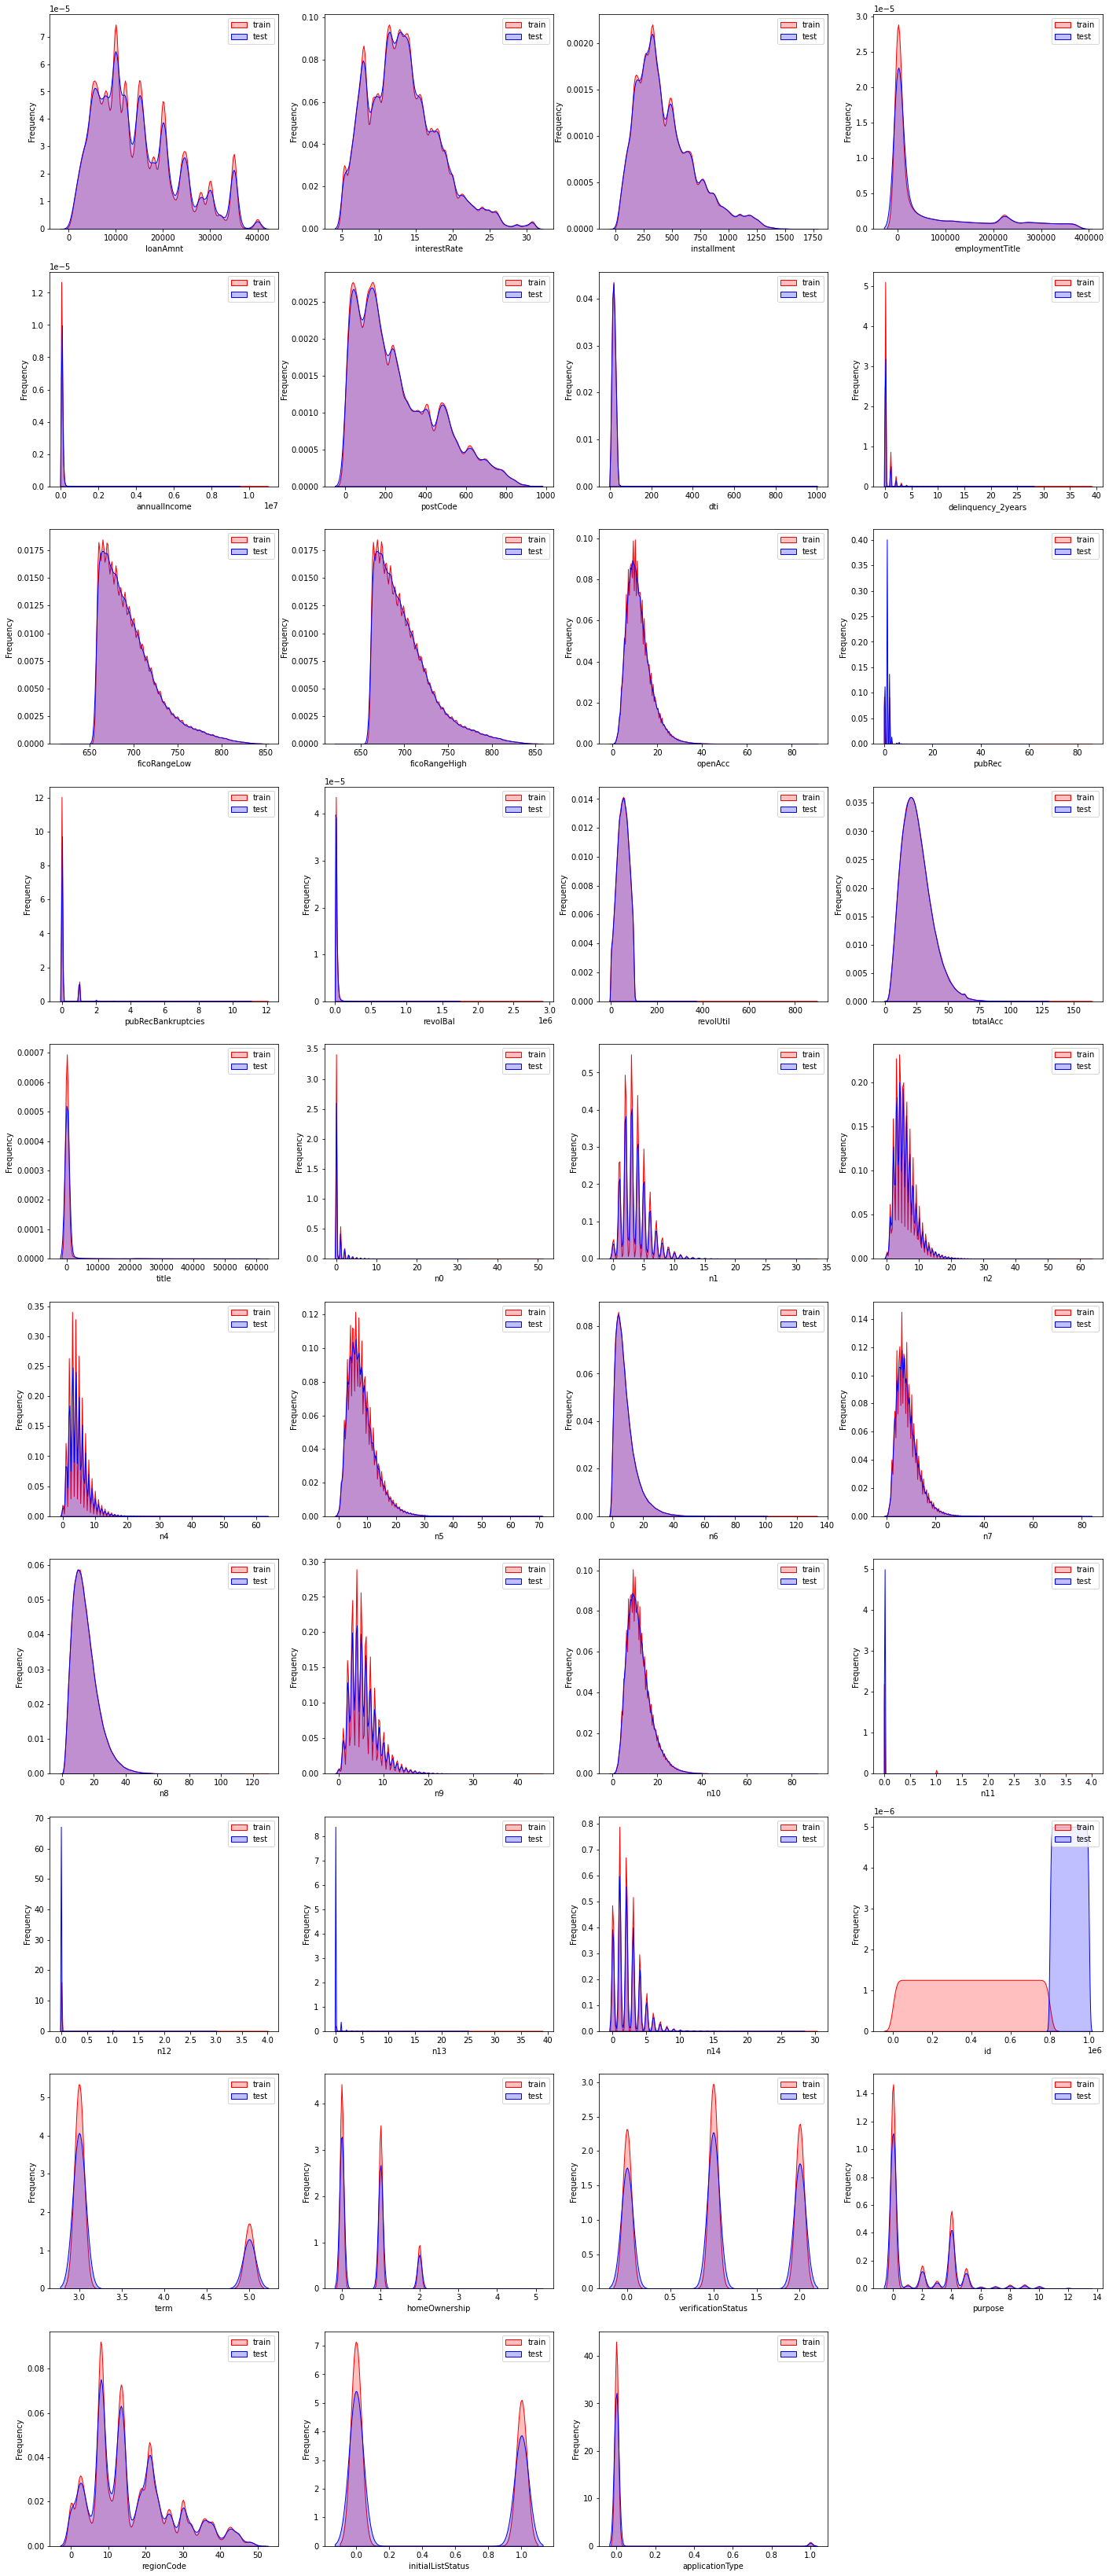

In [21]:
# 通过KDE分布图查看并对比训练集和测试集中数值特征的分布情况，删除分布不一致的特征变量
count_columns = 4
count_rows = len(numerical_fea)
plt.figure(figsize = (6*count_columns, 6*count_rows))
i = 1
for col in numerical_fea:
    if col != 'isDefault':
        ax = plt.subplot(count_rows, count_columns, i)
        ax = sns.kdeplot(train_data[col], color="Red", shade=True)
        ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        ax = ax.legend(["train", "test"])
        i+=1
plt.show()

可以看到：除了id特征以外，其他的特征在训练集和测试集的分布基本一致，而对id特征，在此赛题中，没有涉及到与其他id类特征的交互，id不具有预测违约的信息，因此可以考虑删除。

3. 计算变量间的相关性，考虑删除相关度极高的变量

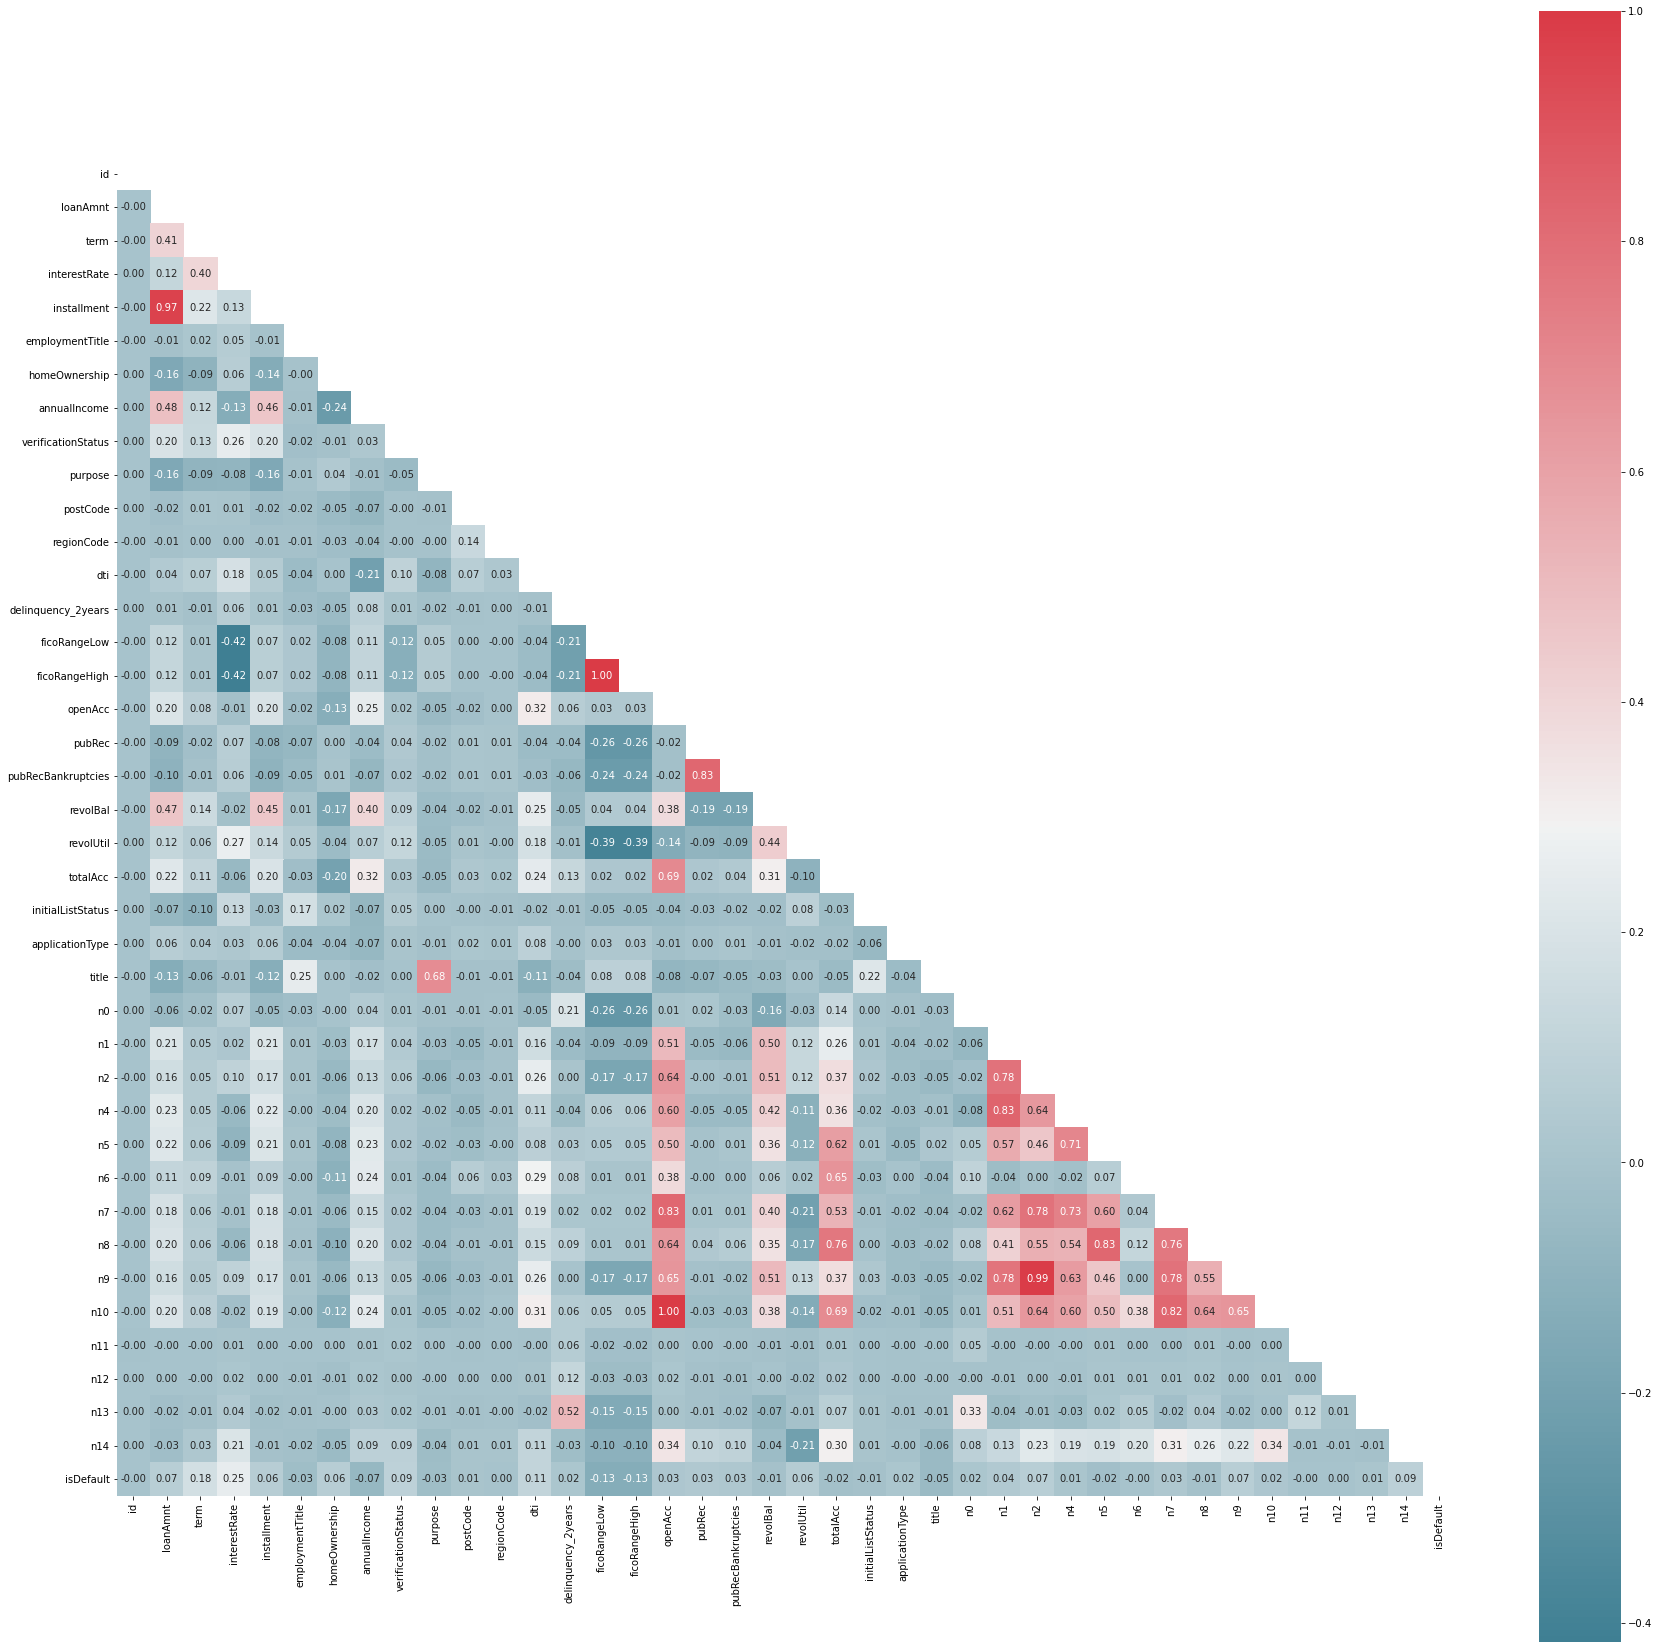

In [23]:
import numpy as np
# 查看特征变量的相关性
plt.figure(figsize=(30,30))
# 便于观察
target = train_data.pop('isDefault')
train_data['isDefault'] = target
mcorr = train_data.corr(method="spearman")
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#亮度，饱和度
cmap = sns.diverging_palette(220,10,as_cmap=True)
g = sns.heatmap(mcorr, mask=mask,  square=True, cmap=cmap, annot=True, fmt="0.2f")
plt.show()


可以看到：

- id对所有变量的相关性均为0
- loanAmnt贷款金额和installment分期付款金额相关度达到0.97
- ficoRangeLow 借款人在贷款发放时的fico所属的下限范围 ficoRangeHigh 借款人在贷款发放时的fico所属的上限范围 相关度达到1.00
- openAcc 借款人信用档案中未结信用额度的数量 和n10 达到1.00
- n2 和 n9 相关性达到0.99

这些冗余的特征可以考虑删除

4. 查看潜在的非数值变量在不同标签的分布情况，探索它们对违约与否的影响

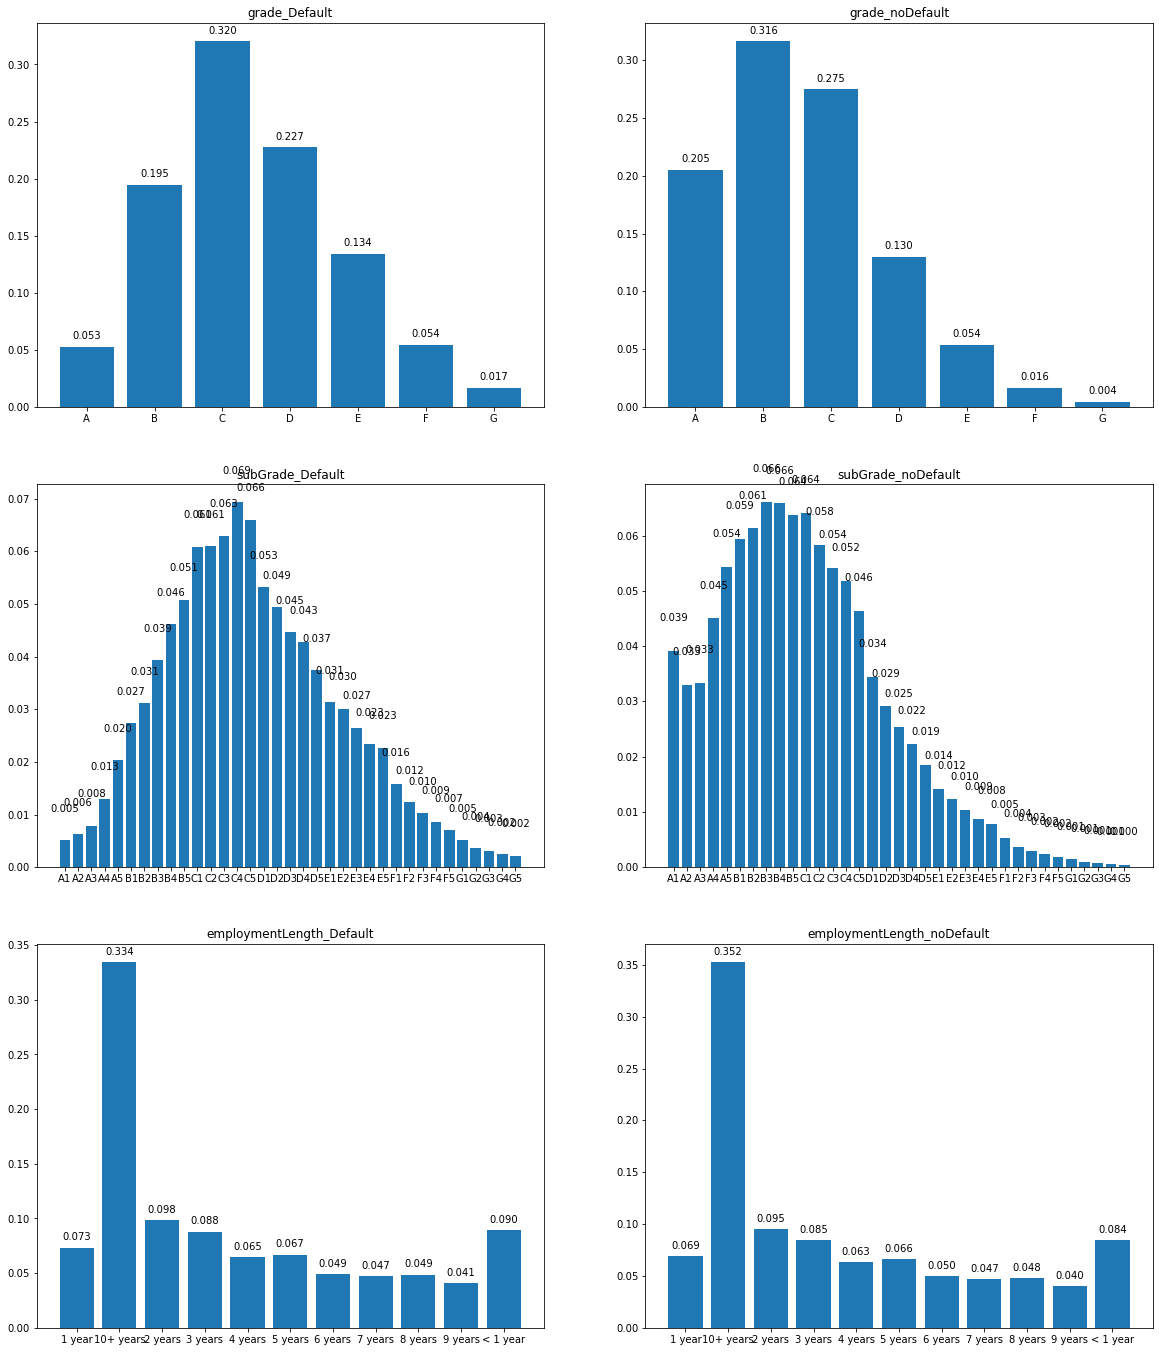

In [26]:
f = train_data.loc[train_data['isDefault']==1]
nf = train_data.loc[train_data['isDefault']==0]

n_list = ['grade', 'subGrade', 'employmentLength']
     
count_columns = 2
count_rows = len(n_list)
plt.figure(figsize = (10*count_columns, 8*count_rows))
i = 0
for col in n_list:
    d = f.groupby(col)[col].count()/f.groupby(col)[col].count().sum()
    x = list(d.index)
    y = list(d.values)    
    i+=1
    ax = plt.subplot(count_rows, count_columns, i)
    plt.bar(x, y)
    plt.title(col+'_Default')
    for a, b in zip(x, y):
        plt.text(a, b + 0.005, '%.3f' % b, ha='center', va='bottom', fontsize=10)
    
    d = nf.groupby(col)[col].count()/nf.groupby(col)[col].count().sum()
    x = list(d.index)
    y = list(d.values)
    i+=1
    ax = plt.subplot(count_rows, count_columns, i)
    plt.bar(x, y)
    plt.title(col+'_noDefault')
    for a, b in zip(x, y):
        plt.text(a, b + 0.005, '%.3f' % b, ha='center', va='bottom', fontsize=10)
plt.show()

grade，subGrade，employmentLength按是否违约的分布如上，违约分布中C级以后的数量明显增加，这说明grade、subGrade与违约存在着明显的序号关系，而employmentLength在两种情况的分布没有明显差异，可以考虑作为无序类别处理

5. 查看样本平衡情况，考虑是否进行不均衡处理

<AxesSubplot:ylabel='isDefault'>

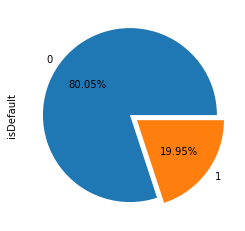

In [28]:
# 正负样本数
train_data['isDefault'].value_counts().plot(kind='pie', autopct='%1.2f%%', explode=[0,0.1])